In [132]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

plt.rc('font', **font)
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

width = 2*3.487
height = 2*3.487

%run ./scripts/util_func.py
%run ./scripts/model_func.py

In [130]:
# print trained params

full_trained_params = np.load('../eval/training_results/husky/icr_asymmetrical/grass/steady-state/full.npy')
print(full_trained_params)

q1_trained_params = np.load('../eval/training_results/husky/icr_asymmetrical/grass/steady-state/quadrans/params_q1.npy')
print(q1_trained_params)
q2_trained_params = np.load('../eval/training_results/husky/icr_asymmetrical/grass/steady-state/quadrans/params_q2.npy')
print(q2_trained_params)
q3_trained_params = np.load('../eval/training_results/husky/icr_asymmetrical/grass/steady-state/quadrans/params_q3.npy')
print(q3_trained_params)
q4_trained_params = np.load('../eval/training_results/husky/icr_asymmetrical/grass/steady-state/quadrans/params_q4.npy')
print(q4_trained_params)

[ 0.870681    0.87817819 -0.09108473  0.4887115  -0.51384366]
[ 0.90498426  0.89865768 -0.09952315  0.55981458 -0.50292301]
[ 0.91082192  0.95325126 -0.10342689  0.47939792 -0.61455232]
[ 0.91130343  0.88034642 -0.0680105   0.54087524 -0.50184232]
[ 0.86287995  0.88583414 -0.10114456  0.47444192 -0.53379881]


In [124]:
# import datasets

full_results_dataframe = pd.read_pickle('../data/husky/eval_results/doughnuts/grass_2/husky_grass_2_full_eval_metrics.pkl')

q1_results_dataframe = pd.read_pickle('../data/husky/eval_results/doughnuts/grass_2/quadrans/husky_grass_2_q1_eval_metrics.pkl')
q2_results_dataframe = pd.read_pickle('../data/husky/eval_results/doughnuts/grass_2/quadrans/husky_grass_2_q2_eval_metrics.pkl')
q3_results_dataframe = pd.read_pickle('../data/husky/eval_results/doughnuts/grass_2/quadrans/husky_grass_2_q3_eval_metrics.pkl')
q4_results_dataframe = pd.read_pickle('../data/husky/eval_results/doughnuts/grass_2/quadrans/husky_grass_2_q4_eval_metrics.pkl')
print(q1_results_dataframe)

    prediction_error_x prediction_error_y prediction_error_z  \
0             0.056916          -0.051861           0.021817   
1             0.086426           0.044475           0.041775   
2             0.045603           0.000689           0.030069   
3             -0.11652           0.023253           0.004066   
4             -0.05948          -0.046875           0.000852   
..                 ...                ...                ...   
637           0.081587          -0.030365          -0.046079   
638          -0.009124            0.01511           0.026581   
639           0.009019          -0.012277          -0.007714   
640            0.02524          -0.008842           0.007318   
641          -0.049239           0.022299          -0.000081   

    prediction_error_roll prediction_error_pitch prediction_error_yaw  \
0                 0.01211               0.008388             0.025027   
1                0.011434              -0.019495             0.007132   
2           

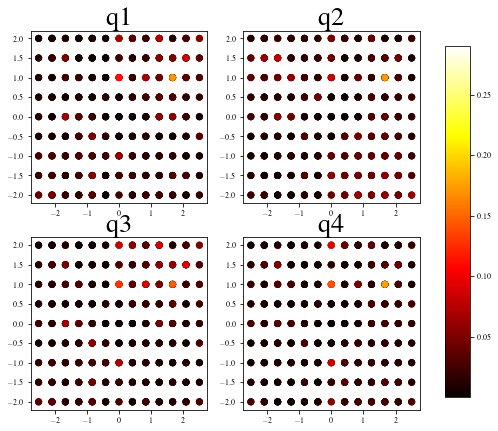

In [125]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

alpha_plot = 1.0

error_max = max(q1_results_dataframe['prediction_error_3dof'].max(), 
                  q2_results_dataframe['prediction_error_3dof'].max(), 
                  q3_results_dataframe['prediction_error_3dof'].max(), 
                  q4_results_dataframe['prediction_error_3dof'].max())

error_min = min(q1_results_dataframe['prediction_error_3dof'].min(), 
                  q2_results_dataframe['prediction_error_3dof'].min(), 
                  q3_results_dataframe['prediction_error_3dof'].min(), 
                  q4_results_dataframe['prediction_error_3dof'].min())

cmd_q1 = axs[0,0].scatter(q1_results_dataframe['body_cmd_omega'], q1_results_dataframe['body_cmd_vx'], 
                  c = q1_results_dataframe['prediction_error_3dof'], 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Body vel commands',
                 rasterized=True)
axs[0,0].set_title('q1')

cmd_q2 = axs[0,1].scatter(q2_results_dataframe['body_cmd_omega'], q2_results_dataframe['body_cmd_vx'], 
                  c = q2_results_dataframe['prediction_error_3dof'], 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Body vel commands',
                 rasterized=True)
axs[0,1].set_title('q2')

cmd_q3 = axs[1,0].scatter(q3_results_dataframe['body_cmd_omega'], q3_results_dataframe['body_cmd_vx'], 
                  c = q3_results_dataframe['prediction_error_3dof'], 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Body vel commands',
                 rasterized=True)
axs[1,0].set_title('q3')

cmd_q4 = axs[1,1].scatter(q4_results_dataframe['body_cmd_omega'], q4_results_dataframe['body_cmd_vx'], 
                  c = q4_results_dataframe['prediction_error_3dof'], 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Body vel commands',
                 rasterized=True)
axs[1,1].set_title('q4')

# encoder = ax.scatter(diff_drive_vels[:, 2], diff_drive_vels[:, 0], 
#                   c = 'tab:orange', 
#                   cmap = 'hot', 
#                   alpha = alpha_plot, 
#                   lw=0, 
#                   s=5,
#                   label='Diff-drive_encoder',
#                  rasterized=True)

# icp = ax.scatter(imu_yaw, icp_vels[:, 0], 
#                   c = 'tab:green', 
#                   cmap = 'hot', 
#                   alpha = alpha_plot, 
#                   lw=0, 
#                   s=5,
#                   label='ICP (lon) and IMU (ang)',
#                  rasterized=True)

cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(cmd_q1, cax=cbar_ax)

ax.set_ylabel('linear velocity [m/s]', labelpad=-2)
ax.set_xlabel('angular velocity [rad/s]')

# fig.subplots_adjust(left=.15, bottom=.17, right=.98, top=.98)
fig.set_size_inches(width, height)

plt.savefig('/home/dominic/repos/norlab_WMRD/DB/figs/husky/grass/steady-state/quadrans/quadrans_3dof_error', dpi=500)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9853cb1b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9853cbe100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9853cb1850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9853cbe6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9853cbe970>],
 'means': []}

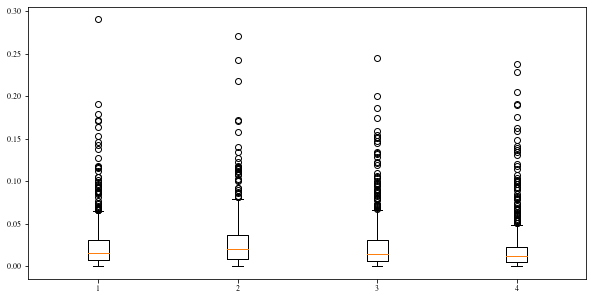

In [126]:
fig, ax = plt.subplots(1, figsize=(10,5))

ax.boxplot(q1_results_dataframe['prediction_error_3dof'], positions = [1])
ax.boxplot(q2_results_dataframe['prediction_error_3dof'], positions = [2])
ax.boxplot(q3_results_dataframe['prediction_error_3dof'], positions = [3])
ax.boxplot(q4_results_dataframe['prediction_error_3dof'], positions = [4])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9853bcebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9853bdb190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9853bce8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9853bdb730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9853bdba00>],
 'means': []}

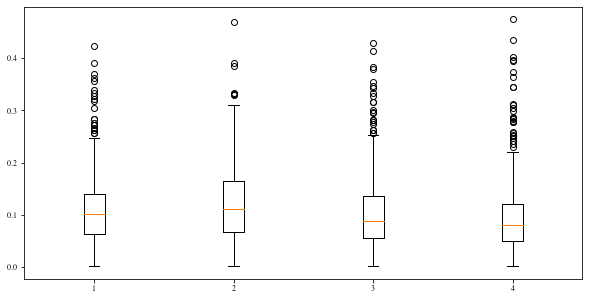

In [127]:
fig, ax = plt.subplots(1, figsize=(10,5))

ax.boxplot(q1_results_dataframe['prediction_error_3dof_trans'], positions = [1])
ax.boxplot(q2_results_dataframe['prediction_error_3dof_trans'], positions = [2])
ax.boxplot(q3_results_dataframe['prediction_error_3dof_trans'], positions = [3])
ax.boxplot(q4_results_dataframe['prediction_error_3dof_trans'], positions = [4])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9853b62a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9853b62fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9853b62730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9853b6d580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9853b6d850>],
 'means': []}

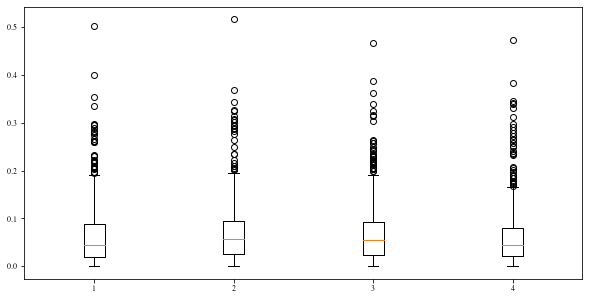

In [128]:
fig, ax = plt.subplots(1, figsize=(10,5))

ax.boxplot(q1_results_dataframe['prediction_error_3dof_ang'], positions = [1])
ax.boxplot(q2_results_dataframe['prediction_error_3dof_ang'], positions = [2])
ax.boxplot(q3_results_dataframe['prediction_error_3dof_ang'], positions = [3])
ax.boxplot(q4_results_dataframe['prediction_error_3dof_ang'], positions = [4])

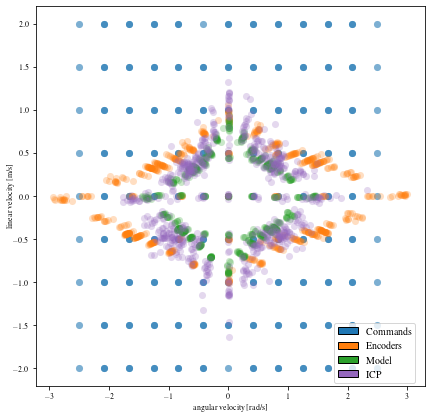

In [141]:
fig, ax = plt.subplots(1, figsize=(10,10))

alpha_plot = 0.25

cmd = ax.scatter(full_results_dataframe['body_cmd_omega'], full_results_dataframe['body_cmd_vx'], 
                  c = 'tab:blue', 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Commands',
                 rasterized=True)

encoder = ax.scatter(full_results_dataframe['body_encoder_omega'], full_results_dataframe['body_encoder_vx'], 
                  c = 'tab:orange', 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Encoders',
                 rasterized=True)

model = ax.scatter(full_results_dataframe['body_model_omega'], full_results_dataframe['body_model_vx'], 
                  c = 'tab:green', 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Model',
                 rasterized=True)

icp = ax.scatter(full_results_dataframe['body_icp_omega'], full_results_dataframe['body_icp_vx'], 
                  c = 'tab:purple', 
                  cmap = 'hot', 
                  vmin = error_min,
                  vmax = error_max,
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='ICP',
                 rasterized=True)

ax.set_ylabel('linear velocity [m/s]', labelpad=-2)
ax.set_xlabel('angular velocity [rad/s]')

cmd_patch = mpatches.Patch(facecolor='tab:blue', edgecolor='k')
encoder_patch = mpatches.Patch(facecolor='tab:orange', edgecolor='k')
model_patch = mpatches.Patch(facecolor='tab:green', edgecolor='k')
icp_patch = mpatches.Patch(facecolor='tab:purple', edgecolor='k')

fig.legend([cmd_patch, encoder_patch, model_patch, icp_patch], 
           ['Commands', 'Encoders', 'Model', 'ICP'], 
           fancybox=True, prop={'size': 10}, ncol=1,
           loc='lower center',          
           bbox_to_anchor=(.8, .12))

# fig.subplots_adjust(left=.15, bottom=.17, right=.98, top=.98)
fig.set_size_inches(width, height)

plt.savefig('/home/dominic/repos/norlab_WMRD/DB/figs/husky/grass/steady-state/commands_encoders_model_icp.jpg', dpi=500)